In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'ap2020_anonymized.xlsx'
file_csv = 'ap2020_anonymized_cleaned.csv'
plt.style.use('bmh')

In [17]:
df = pd.read_excel(file)

from datetime import date

today = date.today()

# given data are from before 2020
border_rocnik = 21

def get_age(x) -> int:
    birth_year = int(x + 2000 if x < border_rocnik else x + 1900)

    return today.year - birth_year

df['vek'] = df['ročník'].apply(get_age)

# Check for correctness (age of patient cannot be negative)
# In reality, you would ask supervisor, but in this case, assume)
ages = df['vek']
for age in ages:
    if age <= 0:
        raise ValueError(f'You cannot have negative age!')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051 entries, 0 to 5050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   číslo        5051 non-null   int64         
 1   ročník       5051 non-null   int64         
 2   datum a čas  5051 non-null   datetime64[ns]
 3   příjat       5051 non-null   object        
 4   důvod        5051 non-null   object        
 5   odeslán      5051 non-null   object        
 6   lékař        4967 non-null   object        
 7   vek          5051 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 315.8+ KB


In [19]:
df.head()

,číslo,ročník,datum a čas,příjat,důvod,odeslán,lékař,vek
0,20200001,46,2020-01-01 04:18:00,přes RZP/LSPP,bolest na hrudi,na oddělení KK,MUDr. Jan První,77
1,20200002,83,2020-01-01 09:09:00,z ambulance KK IKEM,jiný,domácí ošetření,MUDr. Pavel Druhý,40
2,20200003,72,2020-01-01 11:35:00,bez doporučení,palpitace,domácí ošetření,MUDr. Pavel Druhý,51
3,20200004,99,2020-01-01 14:23:00,bez doporučení,bolest na hrudi,na oddělení KK,MUDr. Pavel Druhý,24
4,20200005,28,2020-01-01 15:06:00,přes RZP/LSPP,jiný,na oddělení KK,MUDr. Pavel Druhý,95


In [20]:
# Check if data cleaning is neccessary
for col in df.columns:
    if np.any(df[col].isnull()):
        print(f'Column "{col}" has null values.')

Column "lékař" has null values.


### Since there are missing values in column "lékař" and we have no obvious way filling in the data, we drop the corresponding rows.

In [21]:
df.dropna(inplace=True)

In [22]:
df.to_csv(file_csv)

In [23]:
# Basic analysis
print(f'Total amount of cases: {len(df)}')

print(f'Amount of unique values for each column:')
for col in df.columns:
    print(f'\t"{col}" => {len(df[col].unique())}')

Total amount of cases: 4967
Amount of unique values for each column:
	"číslo" => 4964
	"ročník" => 82
	"datum a čas" => 4895
	"příjat" => 7
	"důvod" => 6
	"odeslán" => 162
	"lékař" => 51
	"vek" => 82


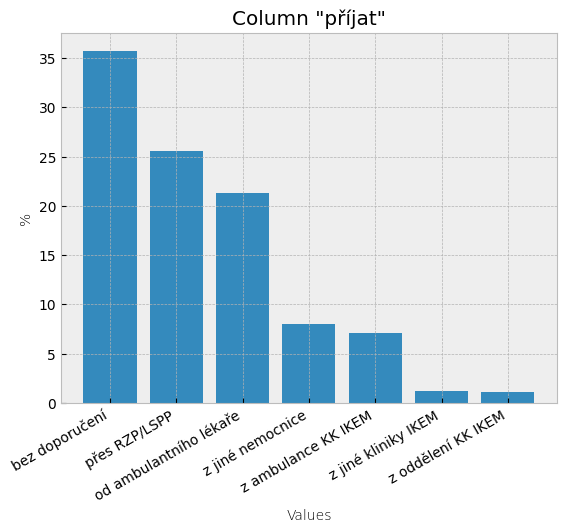

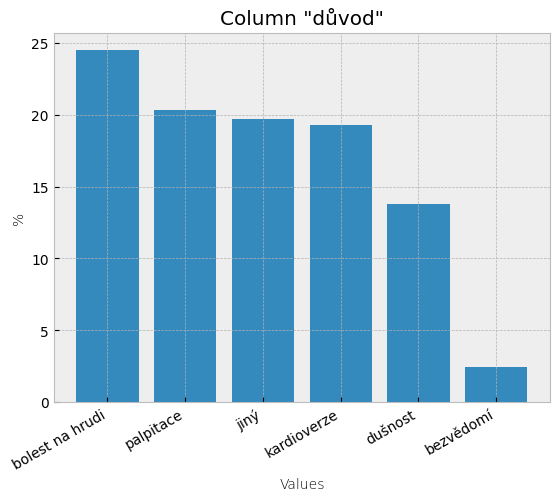

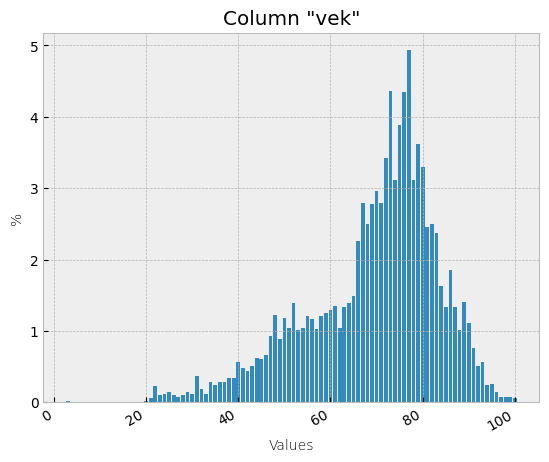

In [24]:
categorical_cols = ['příjat', 'důvod', 'vek']

for col in categorical_cols:
    values, counts = list(), list()
    value_counts = df[col].value_counts()
    for row_idx in value_counts.keys():
        values.append( row_idx )
        counts.append( value_counts[row_idx] )
    
    # normalize to get percentage
    summed = sum(counts)
    counts = [ 100 * count / summed for count in counts ]

    plt.title(f'Column "{col}"')
    plt.ylabel('%', fontweight='light')
    plt.xlabel('Values', fontweight='light')
    plt.xticks(
        rotation=30,
        horizontalalignment='right'
    )
    plt.bar(values, counts)
    plt.show()


## Explanation

### příjat

We can see that most of the admissions come for 3 major reasons:
1. bez doporučení (over 35%)
2. přes RZP/LSPP (over 25%)
3. od ambulantního lékaře (over 20%)

This is in line of thinking that most people go to doctor by themselves or get admitted via ambulance (2nd reason).

### důvod

We can see that most of the reasons patients come are quite comparable except "dusnost" and "bezvedomi", overall good distribution of cases.

### věk

We can see that the most patients are in their 70's to 80's which is in line with general life expectancy distribution.